
# <span style="font-size: 20pt; font-weight: bold; color: #0098cd">MOVIE ANALYSIS</span>

---

### Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:


---

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

---

# 1. CONFIGURACIÓN DEL AMBIENTE

In [ ]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. OBTENCIÓN, TRATAMIENTO Y ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## 2.1 CARGANDO LAS BASES DE DATOS

In [ ]:
import os
from google.colab import files

# Sube el archivo kaggle.json - API de página de Kaggle
uploaded = files.upload()

# # Crea el directorio .kaggle y mueve el archivo kaggle.json allí
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# # Establece los permisos adecuados para el archivo kaggle.json
# !chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


In [ ]:
## Copiando el API command del dataset de Kaggle
!kaggle datasets download -d asaniczka/tmdb-movies-dataset-2023-930k-movies
!kaggle datasets download -d ashirwadsangwan/imdb-dataset

# Descomprime el archivo descargado si es necesario
# !unzip dataset-name.zip
!unzip imdb-dataset.zip
!unzip tmdb-movies-dataset-2023-930k-movies.zip

Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
License(s): ODC Attribution License (ODC-By)
404 - Not Found - No gcs url found
Dataset URL: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset
License(s): other
imdb-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset.zip
replace name.basics.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: unzip:  cannot find or open tmdb-movies-dataset-2023-930k-movies.zip, tmdb-movies-dataset-2023-930k-movies.zip.zip or tmdb-movies-dataset-2023-930k-movies.zip.ZIP.


In [ ]:
## Por si falla el Link de Kaggle, lo tengo cargado en mi dataset de kaggle
!kaggle datasets download -d zerberus10288/tmdb-movie-dataset
!unzip tmdb-movie-dataset.zip
!rm tmdb-movie-dataset.zip

Archive:  tmdb-movie-dataset.zip
  inflating: TMDB_movie_dataset_v11.csv  


In [ ]:
## De ser necesario, eliminar los archivos zippeados
!rm imdb-dataset.zip
!rm tmdb-movies-dataset-2023-930k-movies.zip

rm: cannot remove 'tmdb-movies-dataset-2023-930k-movies.zip': No such file or directory


 **NOTA:**

 > Dask is lazily evaluated. The result from a computation isn’t computed until you ask for it. Instead, a Dask task graph for the computation is produced.

 > Anytime you have a Dask object and you want to get the result, call compute

In [ ]:
df_title_basics = dd.read_csv(r'/content/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [ ]:
## Validando para un identificador 'tt10872600'
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
643954,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,\N,148,"Action,Adventure,Fantasy"


In [ ]:
df_title_ratings = dd.read_csv(r'/content/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2058
1,tt0000002,5.70,276
2,tt0000003,6.50,2023
3,tt0000004,5.40,179
4,tt0000005,6.20,2789
5,tt0000006,5.10,187
6,tt0000007,5.40,874
7,tt0000008,5.40,2203
8,tt0000009,5.40,212
9,tt0000010,6.80,7605


In [ ]:
## Validando para el mismo identificador 'tt10872600'
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

,tconst,averageRating,numVotes
510532,tt10872600,8.20,888144


In [ ]:
df_tmdb = dd.read_csv(r'/content/TMDB_movie_dataset_v11.csv', low_memory=False)
df_tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.93,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.08,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
## Validando para el mismo identificador 'tt10872600'
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57,634649,Spider-Man: No Way Home,7.99,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,200000000,https://www.spidermannowayhome.movie,tt10872600,en,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.06,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog","new york city, hero, showdown, magic, loss of ..."


**OBSERVACIÓN:**
* Podemos observar que para el mismo identificador, encontramos valores en las tres tablas a analizar. Por consiguiente nos guiaremos de los identificadores **'tconst'**, para realizar nuestras consultas en las tres tablas.

## 2.2 TRATAMIENTO DE DATOS

### 2.2.1 Tabla 'df_title_basics'

In [ ]:
df_title_basics.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, tconst to genres
dtypes: string(9)

In [ ]:
## Verificando la cantidad de filas que tenemos en el dataset
df_title_basics.shape[0].compute()

10858256

Obs:
* Notamos que tenemos 9 columnas y 10 858 256 filas.
* Tener en cuenta que nuestro dataset se actualiza diariamente, el valor de las filas puede variar en cada corrida.


In [ ]:
## Verificando la cantidad  de valores por categoría
df_title_basics.titleType.value_counts(normalize=True).compute()

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

* Observamos que la predominancia de los tipos de formatos en el streaming es de los tvEpisode, sin embargo, consideramos que los más importantes para nuestros análisis de rendimiento y recomendación para la plataforma de streaming, son las categorías **'movie', 'short' y 'tvSeries'**. Lo demás no se considerará para nuestros análisis.

In [ ]:
df_title_basics = df_title_basics[df_title_basics['titleType'].isin(['short','movie','tvSeries'])].compute()
df_title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [ ]:
df_title_basics['titleType'].value_counts()

titleType
short       1000651
movie        683967
tvSeries     265387
Name: count, dtype: int64[pyarrow]

In [ ]:
##Verificando valores nulos en nuestro dataframe
df_title_basics.isnull().sum()

tconst            0
titleType         0
primaryTitle      5
originalTitle     5
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres            0
dtype: int64

* Notamos que para la cantidad de datos que poseemos, tenemos muy pocos valores nulos en nuestro dataframe.
* Tener en cuenta que en nuestra información del dataframe en Kaggle, nos indica que los datos que sean /N o //N, serán considerados como datos nulos. Entonces procederemos a realizar esa modificación.

In [ ]:
## Reemplazando los valores /N o \\N por np.nan, de todo el dataframe
for i in df_title_basics.columns:
   df_title_basics[i] = df_title_basics[i].replace('/N', np.nan).replace('\\N', np.nan)

##Verificando nuevamente valores nulos en nuestro dataframe
df_title_basics.isnull().sum()

tconst                  0
titleType               0
primaryTitle            5
originalTitle           5
isAdult                 0
startYear          158208
endYear           1853075
runtimeMinutes     775082
genres              96487
dtype: int64

* Luego de analizar los valores nulos en nuestro dataframe, notamos que existen una cantidad grande de estos para la variable **'endYear'**. Como vemos que ocupa casi todo nuestro dataset, si eliminamos respecto a esta variable, nos quedariamos sin registros y considerando que tenemos datos de **'startYear'**, decidimos eliminar la variable **'endYear'**.

* De esta manera, decidimos elimnar el resto de variables **NaN**, para todas las demás variables.


In [ ]:
## Eliminando columna 'endYear'
df_title_basics.drop(columns=['endYear','primaryTitle'], inplace=True)

# Eliminar filas con NaN
df_title_basics.dropna(inplace=True)

## Eliminando duplicados del dataframe
df_title_basics = df_title_basics.drop_duplicates()

# Verificando nuevamente si tenemos valores nulos
df_title_basics.isnull().sum()

tconst            0
titleType         0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

In [ ]:
## Validando cantidad de registros que tenemos
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129090 entries, 0 to 785533
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1129090 non-null  string
 1   titleType       1129090 non-null  string
 2   originalTitle   1129090 non-null  string
 3   isAdult         1129090 non-null  string
 4   startYear       1129090 non-null  string
 5   runtimeMinutes  1129090 non-null  string
 6   genres          1129090 non-null  string
dtypes: string(7)
memory usage: 94.8 MB


* Validamos que tenemos 1 129 090 filas y 7 columnas.
* No registramos valores nulos.
* Necesitamos modificar el tipo de datos para las variables 'isAdult', 'startYear' y 'runtimeMinutes'.

In [ ]:
df_title_basics['isAdult'] = df_title_basics['isAdult'].astype('int')
df_title_basics['startYear'] = df_title_basics['startYear'].astype('int')
df_title_basics['runtimeMinutes'] = df_title_basics['runtimeMinutes'].astype('int')

df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129090 entries, 0 to 785533
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1129090 non-null  string
 1   titleType       1129090 non-null  string
 2   originalTitle   1129090 non-null  string
 3   isAdult         1129090 non-null  int64 
 4   startYear       1129090 non-null  int64 
 5   runtimeMinutes  1129090 non-null  int64 
 6   genres          1129090 non-null  string
dtypes: int64(3), string(4)
memory usage: 99.9 MB


In [ ]:
## Guardando el dataset en un csv para trabajarlo posteriormente
# Guardar el DataFrame como un archivo CSV
df_title_basics.to_csv('df_title_basics.csv', index=False)

### 2.2.1 Tabla 'df_title_ratings'

In [ ]:
df_title_ratings.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, tconst to numVotes
dtypes: float64(1), int64(1), string(1)

In [ ]:
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2058
1,tt0000002,5.70,276
2,tt0000003,6.50,2023
3,tt0000004,5.40,179
4,tt0000005,6.20,2789
5,tt0000006,5.10,187
6,tt0000007,5.40,874
7,tt0000008,5.40,2203
8,tt0000009,5.40,212
9,tt0000010,6.80,7605


In [ ]:
df_title_ratings.isnull().sum().compute()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [ ]:
df_title_ratings.shape[0].compute()

1448329

In [ ]:
df_title_ratings.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [ ]:
## Reemplazando los valores /N o \\N por np.nan, de todo el dataframe
for i in df_title_ratings.columns:
   df_title_ratings[i] = df_title_ratings[i].replace('/N', np.nan).replace('\\N', np.nan)

df_title_ratings.isnull().sum().compute()

tconst           0
averageRating    0
numVotes         0
dtype: int64

* validamos que no hay presencia de datos nulos.
* Convertimos los tipos de datos a datos correctos para cada columna.

In [ ]:
## Corrigiendo los tipos de datos de las columnas del dataframe
df_title_ratings['tconst'] = df_title_ratings['tconst'].astype('str')
df_title_ratings['averageRating'] = df_title_ratings['averageRating'].astype('float')
df_title_ratings['numVotes'] = df_title_ratings['numVotes'].astype('int')

## Transformando de dask dataframe a pandas dataframe
df_title_ratings = df_title_ratings.compute()

## Eliminando duplicados del dataframe
df_title_ratings = df_title_ratings.drop_duplicates()

In [ ]:
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448329 entries, 0 to 1448328
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1448329 non-null  string 
 1   averageRating  1448329 non-null  float64
 2   numVotes       1448329 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.4 MB


### 2.2.1 Tabla 'df_tmdb'

In [ ]:
df_tmdb.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 24 entries, id to keywords
dtypes: bool(1), float64(2), int64(5), string(16)

In [ ]:
df_tmdb.shape[0].compute()

1055933

In [ ]:
## Considerando solo valores de 'revenue' y 'budget' mayores que cero
df_tmdb = df_tmdb[df_tmdb['revenue'] > 0]
df_tmdb = df_tmdb[df_tmdb['budget'] > 0]

## Creando la variable 'roi', que nos ayudará a evaluar
df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']

## COnsiderando solo 'roi's mayores de cero, ya que necesitamos optimizar la plataforma
df_tmdb = df_tmdb[df_tmdb['roi']>0]

## Reemplazando los valores /N o \\N por np.nan, de todo el dataframe
for i in df_tmdb.columns:
   df_tmdb[i] = df_tmdb[i].replace('/N', np.nan).replace('\\N', np.nan)

df_tmdb.isnull().sum().compute()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date             747
revenue                    0
runtime                    0
adult                      0
backdrop_path           1537
budget                     0
homepage                5346
imdb_id                 1256
original_language          0
original_title             0
overview                 469
popularity                 0
poster_path              720
tagline                 1927
genres                   712
production_companies    1217
production_countries    1151
spoken_languages         990
keywords                1633
roi                        0
dtype: int64

In [ ]:
df_tmdb.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'roi'],
      dtype='object')

* Luego de analizar el dataframe, observamos que hay algunas columnas que no nos aportarían valor para nuestro análisis y tienen muchos valores nulos, por ende decidimos eliminar las siguientes columnas del dataframe: ['id','title','adult','backdrop_path','homepage','overview','poster_path','tagline','production_companies','spoken_languages','keywords'].
* Decidimos mantener algunas columnas, por más que tengan bastantes valores nulos, debido a que consideramos que podrían ser interesantes para nuestros análisis, como por ejemplo el país de producción o géneros, para nombrar algunos.

* La columna imdb_id, es muy importante ya que con esta haremos match con las otras tablas. Si bien tiene muchos valores nulos, estos tenemos que trabajarlos posteriormente.

In [ ]:
columnas_eliminar = ['id','backdrop_path','homepage','overview','poster_path','tagline','production_companies','spoken_languages','keywords', 'title', 'adult', 'status']

In [ ]:
## Convirtiendo el dataframde dask a pandas
df_tmdb = df_tmdb.compute()

## Eliminando las columnas no utilizaremos
df_tmdb.drop(columns=columnas_eliminar, inplace=True)

## Eliminando los valores nulos existentes
df_tmdb.dropna(inplace=True)

## Verificando nuevamente los valores nulos
df_tmdb.isnull().sum()

vote_average            0
vote_count              0
release_date            0
revenue                 0
runtime                 0
budget                  0
imdb_id                 0
original_language       0
original_title          0
popularity              0
genres                  0
production_countries    0
roi                     0
dtype: int64

In [ ]:
## Eliminando valores duplicados en el dataframe
df_tmdb = df_tmdb.drop_duplicates()

## Corrigiendo los tipos de datos de las columnas del dataframe
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6609 entries, 0 to 160100
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vote_average          6609 non-null   float64       
 1   vote_count            6609 non-null   int64         
 2   release_date          6609 non-null   datetime64[ns]
 3   revenue               6609 non-null   int64         
 4   runtime               6609 non-null   int64         
 5   budget                6609 non-null   int64         
 6   imdb_id               6609 non-null   string        
 7   original_language     6609 non-null   string        
 8   original_title        6609 non-null   string        
 9   popularity            6609 non-null   float64       
 10  genres                6609 non-null   string        
 11  production_countries  6609 non-null   string        
 12  roi                   6609 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
df_tmdb.head()

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,popularity,genres,production_countries,roi
0,8.36,34495,2010-07-15,825532764,148,160000000,tt1375666,en,Inception,83.95,"Action, Science Fiction, Adventure","United Kingdom, United States of America",4.16
1,8.42,32571,2014-11-05,701729206,169,165000000,tt0816692,en,Interstellar,140.24,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",3.25
2,8.51,30619,2008-07-16,1004558444,152,185000000,tt0468569,en,The Dark Knight,130.64,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",4.43
3,7.57,29815,2009-12-15,2923706026,162,237000000,tt0499549,en,Avatar,79.93,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",11.34
4,7.71,29166,2012-04-25,1518815515,143,220000000,tt0848228,en,The Avengers,98.08,"Science Fiction, Action, Adventure",United States of America,5.90


## 2.3 ANÁLISIS EXPLORATORIO DE DATOS (EDA)

### 2.3.1 EDA - df_title_basics

In [ ]:
df_title_basics.describe()

,isAdult,startYear,runtimeMinutes
count,1129090.00,1129090.00,1129090.00
mean,0.01,2002.50,43.03
std,0.08,24.31,102.47
min,0.00,1874.00,0.00
25%,0.00,1999.00,10.00
50%,0.00,2012.00,23.00
75%,0.00,2017.00,79.00
max,1.00,2030.00,59460.00


In [ ]:
df_title_basics['isAdult'].value_counts().reset_index()

,isAdult,count
0,0,1121232
1,1,7858


<ipython-input-45-aab9c44da921>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x=df_title_basics['isAdult'].value_counts().reset_index()['isAdult'],


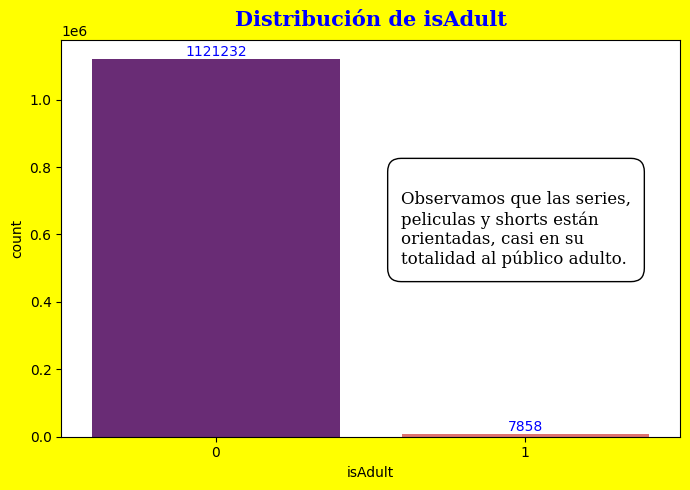

In [ ]:
# Crear la figura
plt.figure(figsize=(7,5))
a = sns.barplot(x=df_title_basics['isAdult'].value_counts().reset_index()['isAdult'],
            y=df_title_basics['isAdult'].value_counts().reset_index()['count'], palette = 'magma')

# Añadir etiquetas de los valores encima de cada barra
for index, row in df_title_basics['isAdult'].value_counts().reset_index().iterrows():
    a.text(row.name, row['count']+ 8000, row['count'], color='blue', ha="center")

# Añadir texto de conclusión
conclusion_text = '''
Observamos que las series,
peliculas y shorts están
orientadas, casi en su
totalidad al público adulto.'''

plt.figtext(0.58, 0.55, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Distribución de isAdult', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.tight_layout()
plt.show()

<ipython-input-39-bfb39dab1286>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_title_basics['startYear'], orient='h', palette='viridis')
<ipython-input-39-bfb39dab1286>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_title_basics['runtimeMinutes'], orient='h', palette='viridis')


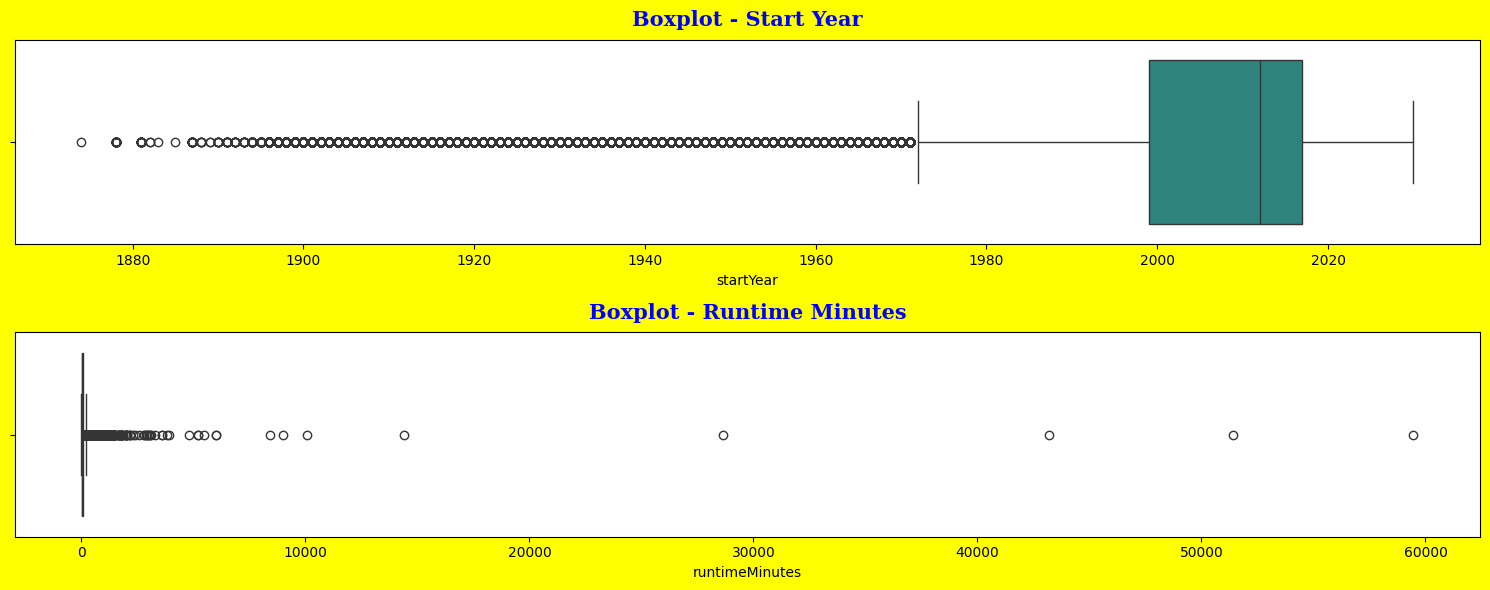

In [ ]:
# Crear la figura y los subplots
plt.figure(figsize=(15, 6))

# Primer subplot: Boxplot de 'startYear'
plt.subplot(2, 1, 1)
sns.boxplot(x=df_title_basics['startYear'], orient='h', palette='viridis')
plt.title('Boxplot - Start Year', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'runtimeMinutes'
plt.subplot(2, 1, 2)
sns.boxplot(x=df_title_basics['runtimeMinutes'], orient='h', palette='viridis')
plt.title('Boxplot - Runtime Minutes', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Mostrar la figura
plt.tight_layout()
plt.show()

* Notamos que hay contenido disponible en la plataforma de una cantidad de minutos demasiado grande, esto nos hace entender que hay contenido que puede durar varios días.

* Observamos que la mayoría del contenido tiene una fecha de inicio alrededor de los 2000 para arriba. Si bien tenemos años de inicio menores, la tendencia no es así.

<ipython-input-40-50e333dcc4cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(x=df_title_basics['titleType'].value_counts().index, y = df_title_basics['titleType'].value_counts().values,


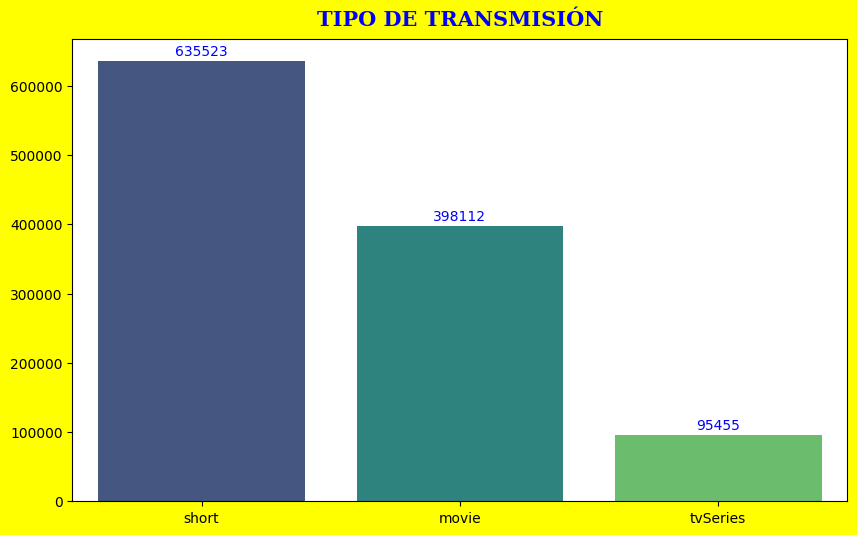

In [ ]:
## Grafico de barras de los tipos de transacción
plt.figure(figsize=(10,6))
a = sns.barplot(x=df_title_basics['titleType'].value_counts().index, y = df_title_basics['titleType'].value_counts().values,
             palette='viridis')
plt.xlabel('')
plt.title('TIPO DE TRANSMISIÓN', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)

# Añadir etiquetas de los valores encima de cada barra
for index, row in df_title_basics['titleType'].value_counts().reset_index().iterrows():
    a.text(row.name, row['count']+ 8000, row['count'], color='blue', ha="center")

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Notamos que la mayoría de contenido abarcan los shorts, seguido de las películas, y por último las series.

* Es importante tener en cuenta esto, ya que quizás los shorts tengan más popularidad o roi, es algo que tenemos que evaluar posteriormente.

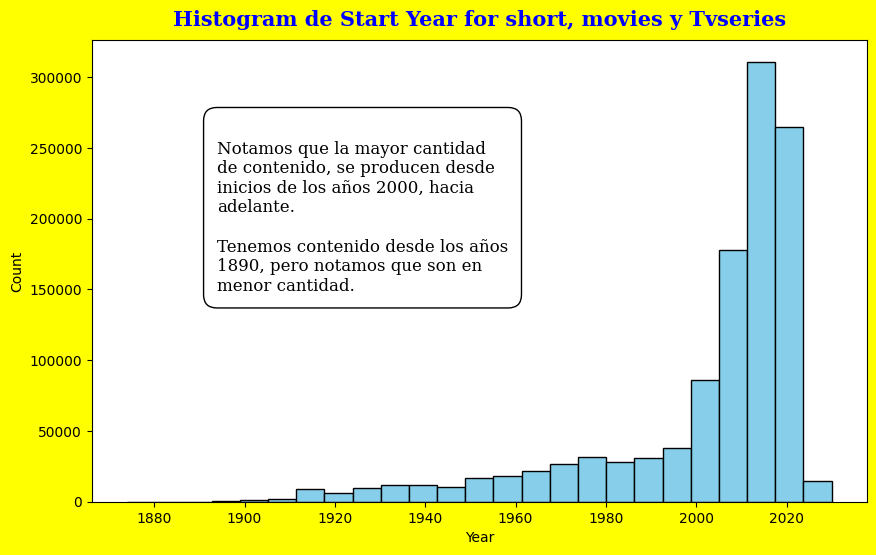

In [ ]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_title_basics['startYear'], bins=25, color='skyblue', edgecolor='black')


# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
Notamos que la mayor cantidad
de contenido, se producen desde
inicios de los años 2000, hacia
adelante.

Tenemos contenido desde los años
1890, pero notamos que son en
menor cantidad.'''

plt.figtext(0.25, 0.6, conclusion_text, fontdict={'fontsize': 12, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'normal', 'color': 'black'}, va='center', ha='left',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8'))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Histogram de Start Year for short, movies y Tvseries', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
plt.show()

In [ ]:
df_title_basics.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,0,1892,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short"


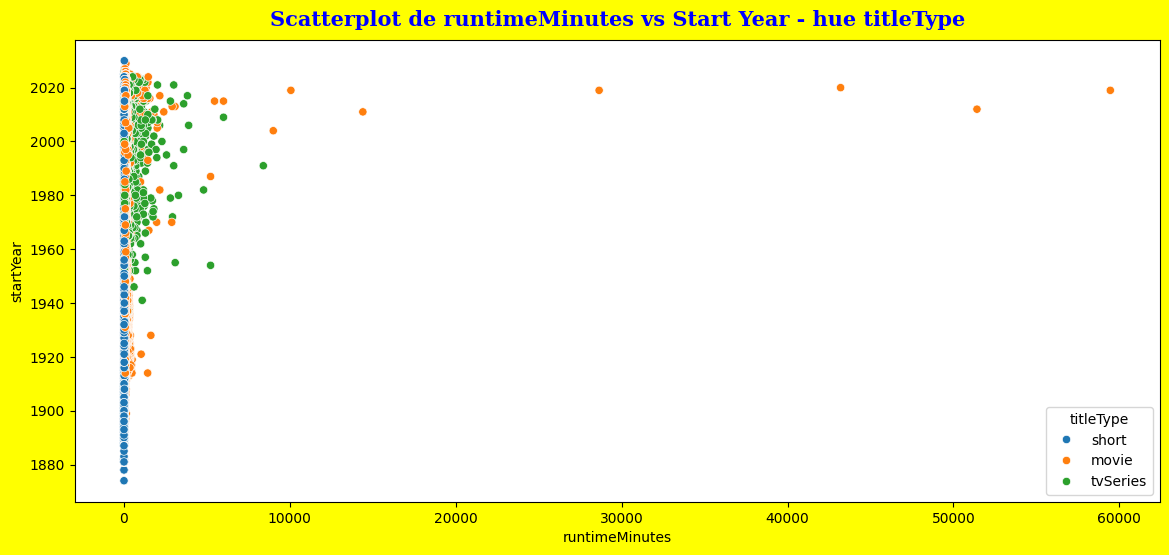

In [ ]:
# Crear la figura
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_title_basics, x='runtimeMinutes', y='startYear', hue= 'titleType')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Scatterplot de runtimeMinutes vs Start Year - hue titleType', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
plt.show()

* Aunque parezca increible, existen short para todos los años, desde 1880 hasta los 2024.
* Algunas movies son las que tienen una gran cantidad de minutos por contenido.

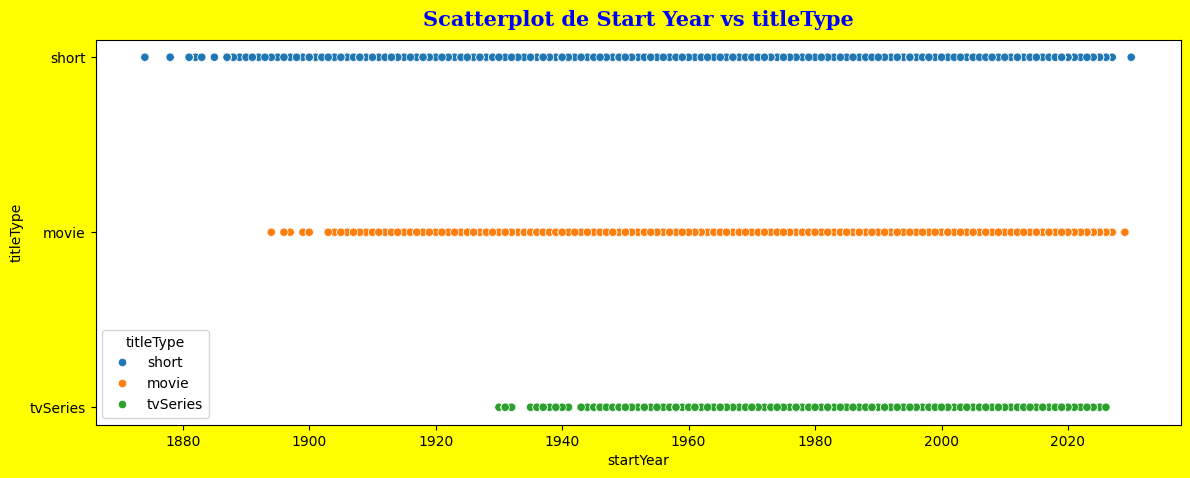

In [ ]:
# Crear la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics, x='startYear', y='titleType', hue= 'titleType')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Scatterplot de Start Year vs titleType', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
plt.grid(False)
plt.show()

* Vemos que los shorts, están presenten para todos los años.
* Las series recién empiezan por los años 1930.
* Tenemos para todos los años desde sus inicios para los tres tipos de contenido.

### 2.3.2 EDA - df_title_ratings

In [ ]:
df_title_ratings.describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.45,0.5,0.55,0.65,0.75,0.85,0.90,0.95,0.975,0.99])

,averageRating,numVotes
count,1448329.00,1448329.00
mean,6.96,1031.89
std,1.38,17699.87
min,1.00,5.00
5%,4.40,6.00
10%,5.20,7.00
15%,5.60,9.00
20%,5.90,10.00
25%,6.20,11.00
30%,6.40,13.00


* Luego de analizar los percentiles, y de acuerdo a lo que deseamos, que es recomendar el mejor contenido, para tener más audiencia. Decidimos que debemos tener un average rating mayor de 5 y numero de votos grande, lo cual nos indica que es un contenido que se visualiza mucho y genera interacción.

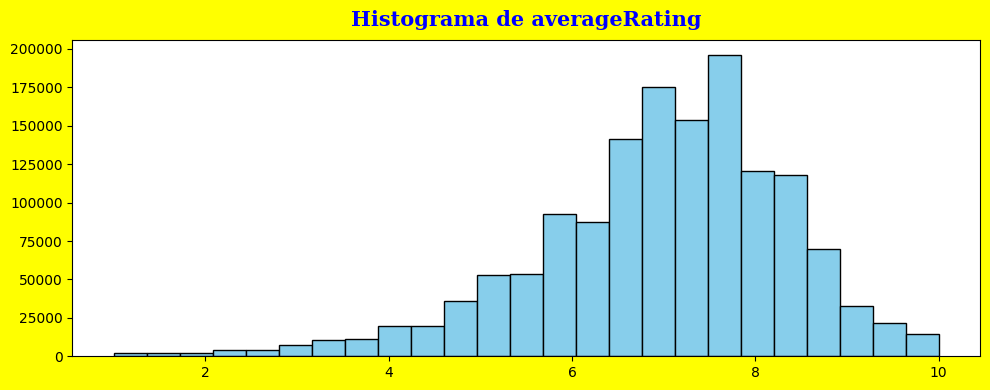

In [ ]:
# Crear el histograma
plt.figure(figsize=(10, 4))
plt.hist(df_title_ratings['averageRating'], bins=25, color='skyblue', edgecolor='black')


# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Histograma de averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Mostrar la figura
plt.tight_layout()
plt.show()

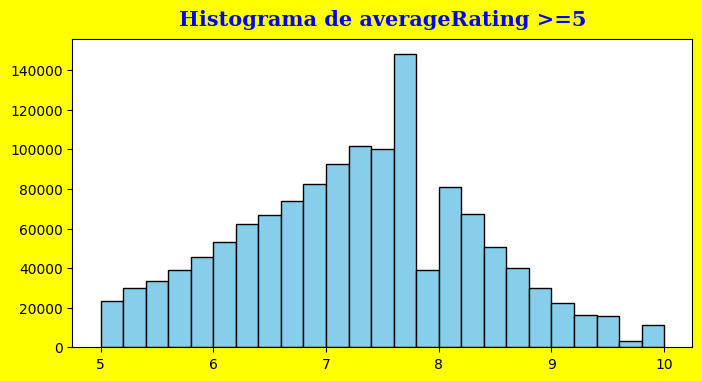

In [ ]:
df_title_ratings_modified = df_title_ratings[df_title_ratings['averageRating']>=5]

# Crear el histograma
plt.figure(figsize=(8, 4))
plt.hist(df_title_ratings_modified['averageRating'], bins=25, color='skyblue', edgecolor='black')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.title('Histograma de averageRating >=5', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

plt.show()

In [ ]:
df_title_ratings_modified.describe(percentiles=[0.05,0.1,0.15,0.2,0.25,0.3,0.45,0.5,0.55,0.65,0.75,0.85,0.90,0.95,0.975,0.99])

,averageRating,numVotes
count,1329396.00,1329396.00
mean,7.23,1085.50
std,1.05,18441.53
min,5.00,5.00
5%,5.40,6.00
10%,5.80,7.00
15%,6.10,8.00
20%,6.30,10.00
25%,6.50,11.00
30%,6.70,13.00


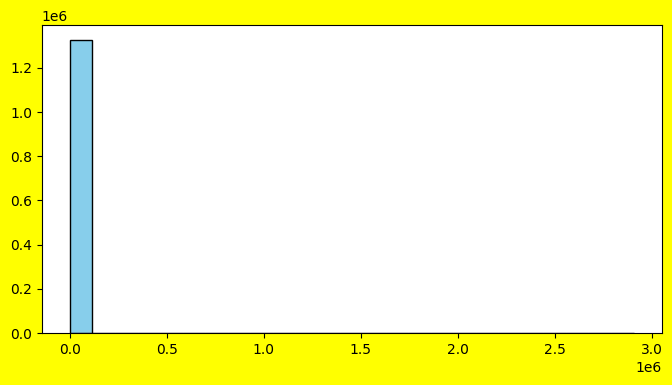

In [ ]:
# Crear el histograma
plt.figure(figsize=(8, 4))
plt.hist(df_title_ratings_modified['numVotes'], bins=25, color='skyblue', edgecolor='black')

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.show()

<ipython-input-49-3fd40242a0c0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_title_ratings_modified['numVotes'], orient='h', palette='viridis')


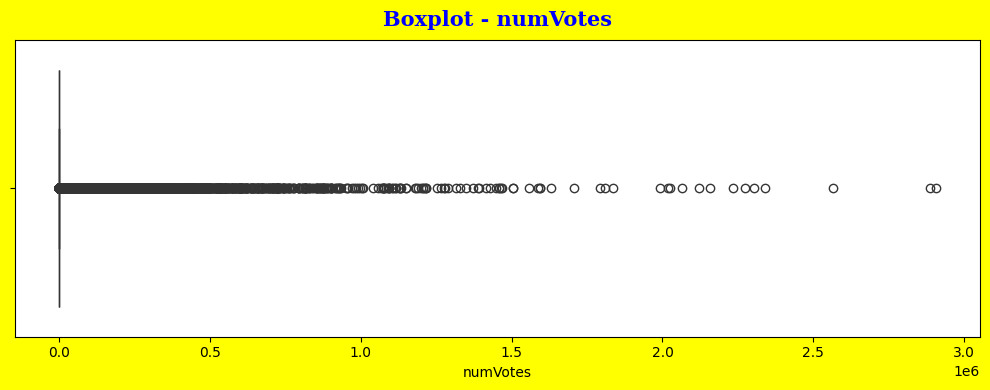

In [ ]:
# Crear la figura
plt.figure(figsize=(10, 4))

sns.boxplot(x=df_title_ratings_modified['numVotes'], orient='h', palette='viridis')
plt.title('Boxplot - numVotes', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Mostrar la figura
plt.tight_layout()
plt.show()

* Si bien vemos que hay contenido que tiene votos muy grandes, pero son casos especificos. Sin embargo, ya realizamos un filtrado con el rating, el cual consideramos es muy valioso a tener en cuenta, entonces con esto, valoraremos también estos casos especificos de cantidad de votos para el contenido especfico. Más bien los que tienen pocos votos, se podrían descartar, ya que nos indicaría que las personas no les agrado mucho, tenemos que evaluar esto con el rating.

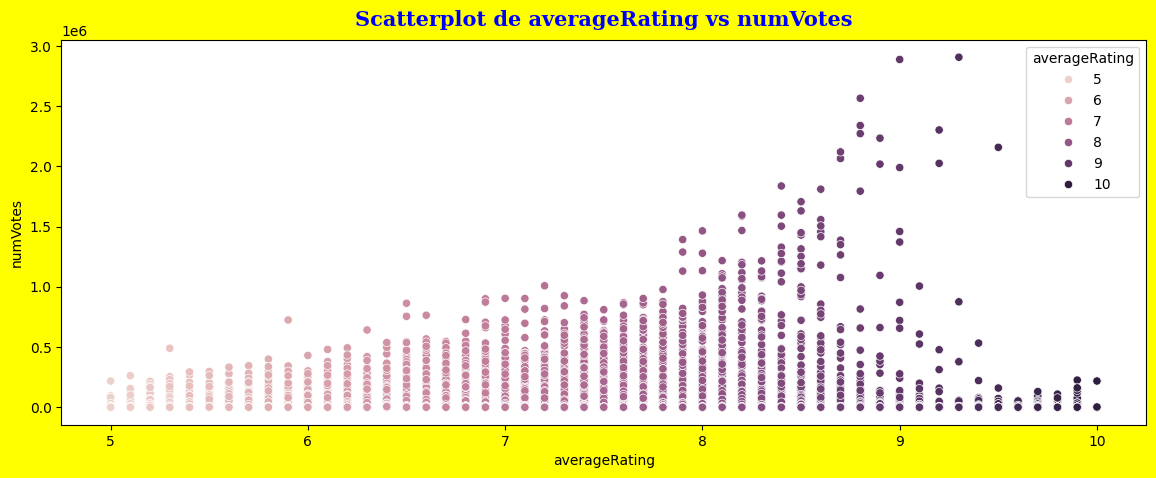

In [ ]:
# Crear la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_ratings_modified, x='averageRating', y='numVotes', hue= 'averageRating')

plt.title('Scatterplot de averageRating vs numVotes', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Observamos que para los ratings, tenemos votos existentes. Por esto, por el momento no descartamos ninguna cantidad de votos.
* Se restringió la cantidad de ratings, para tenerlo desde 5 a 10.

In [ ]:
# Realizando un inner join para poder analizar entre variables
df_title_basics_inner = pd.merge(df_title_basics, df_title_ratings_modified, on='tconst', how='inner')
df_title_basics_inner.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.70,2058
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",5.70,276
2,tt0000003,short,Pauvre Pierrot,0,1892,5,"Animation,Comedy,Romance",6.50,2023
3,tt0000004,short,Un bon bock,0,1892,12,"Animation,Short",5.40,179
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",6.20,2789


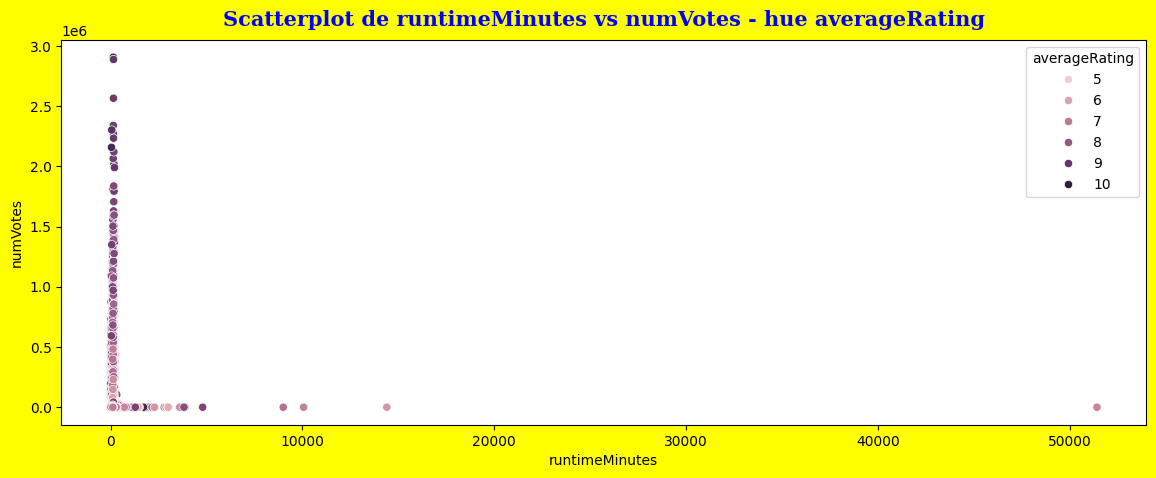

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics_inner, x='runtimeMinutes', y='numVotes', hue= 'averageRating')

plt.title('Scatterplot de runtimeMinutes vs numVotes - hue averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Observamos que la mayoría de contenido, con más votos, tiene menos tiempo de producción. Dado esto, decidimos acotar el runtimeMinutes de nuestro contenido, para continuar analizando. Decidimos bajar la cantidad de minutos a 500 minutos, considerando que tambien algunos tipos de contenido con bastantes minutos tienen rating alto, tomarémos el riesgo de acotar en 500 minutos.

In [ ]:
df_title_basics_inner = df_title_basics_inner[df_title_basics_inner['runtimeMinutes']<500]
df_title_basics_inner.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,0,1894,1,"Documentary,Short",5.70,2058
1,tt0000002,short,Le clown et ses chiens,0,1892,5,"Animation,Short",5.70,276
2,tt0000003,short,Pauvre Pierrot,0,1892,5,"Animation,Comedy,Romance",6.50,2023
3,tt0000004,short,Un bon bock,0,1892,12,"Animation,Short",5.40,179
4,tt0000005,short,Blacksmith Scene,0,1893,1,"Comedy,Short",6.20,2789


In [ ]:
df_title_basics_inner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403109 entries, 0 to 403340
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          403109 non-null  string 
 1   titleType       403109 non-null  string 
 2   originalTitle   403109 non-null  string 
 3   isAdult         403109 non-null  int64  
 4   startYear       403109 non-null  int64  
 5   runtimeMinutes  403109 non-null  int64  
 6   genres          403109 non-null  string 
 7   averageRating   403109 non-null  float64
 8   numVotes        403109 non-null  int64  
dtypes: float64(1), int64(4), string(4)
memory usage: 41.9 MB


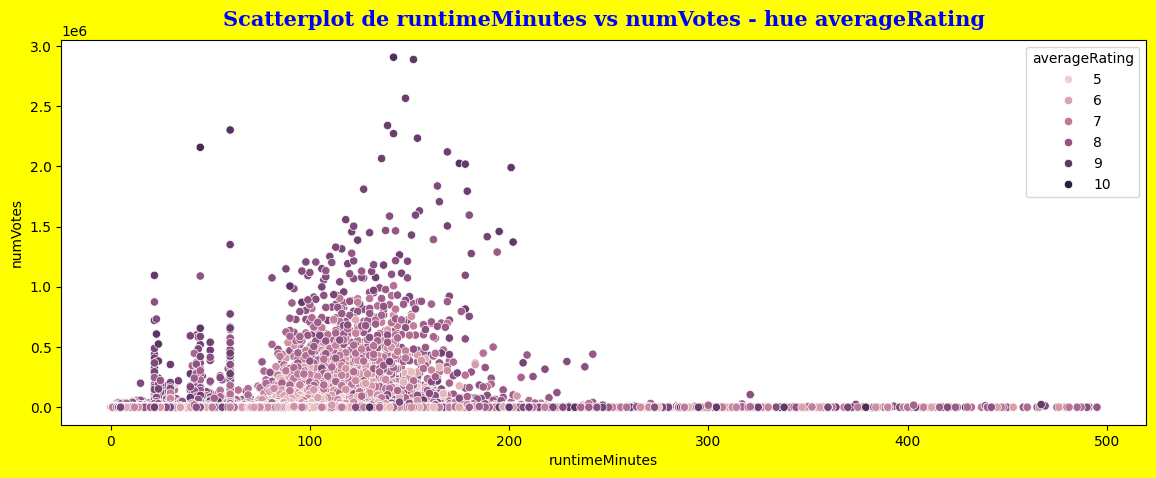

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_title_basics_inner, x='runtimeMinutes', y='numVotes', hue= 'averageRating')

plt.title('Scatterplot de runtimeMinutes vs numVotes - hue averageRating', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Verificamos en la gráfica que obtenemos mayores rantings de valores de 9 y 10, con mayor cantidad de votos, para contenido que tiene una duración de 100 y 200 minutos.
* Tambien podemos notar que existen altos ratings para contenido de pocos minutos, posiblemente para los shorts. Es importante tener en cuenta esto.
* Con esto analizado, procedemos a acotar nuestro **runtimeMinutes** a los 250 minutos, se generará un nuevo dataframe. Esto debido a que si bien necesitamos que tengan rating, pero tambien queremos que tengan más votos, lo cual nos representa más interacción del publico.

In [ ]:
## Acotando nuestros minutos máximos a 250, consideramos de esta manera, rating y numVotes

df_title_basics_modified = df_title_basics[df_title_basics['runtimeMinutes']<250]
df_title_basics_modified.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1127363 entries, 0 to 785533
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1127363 non-null  string
 1   titleType       1127363 non-null  string
 2   originalTitle   1127363 non-null  string
 3   isAdult         1127363 non-null  int64 
 4   startYear       1127363 non-null  int64 
 5   runtimeMinutes  1127363 non-null  int64 
 6   genres          1127363 non-null  string
dtypes: int64(3), string(4)
memory usage: 99.7 MB


### 2.3.2 EDA - df_tmdb

In [ ]:
df_tmdb.describe()

,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,roi
count,6609.00,6609.00,6609,6609.00,6609.00,6609.00,6609.00,6609.00
mean,6.41,2070.39,1999-07-02 00:48:35.297321856,96046099.88,108.14,26492242.65,22.80,904.35
min,0.00,0.00,1913-11-24 00:00:00,2.00,0.00,1.00,0.00,0.00
25%,6.00,98.00,1991-04-12 00:00:00,6582065.00,94.00,1768000.00,7.80,0.82
50%,6.60,704.00,2006-03-17 00:00:00,31500000.00,106.00,10000000.00,15.21,1.97
75%,7.18,2411.00,2014-03-19 00:00:00,102278712.00,122.00,30000000.00,24.17,4.55
max,10.00,34495.00,2024-06-01 00:00:00,2923706026.00,279.00,460000000.00,2994.36,2755583.00
std,1.47,3498.02,NaN,184650572.51,27.81,42728328.71,71.62,41118.09


In [ ]:
## Modificando el nombre de

<ipython-input-97-0a78a19e266a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb['revenue'], orient='h', palette='viridis')
<ipython-input-97-0a78a19e266a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb['budget'], orient='h', palette='viridis')
<ipython-input-97-0a78a19e266a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb['roi'], orient='h', palette='viridis')


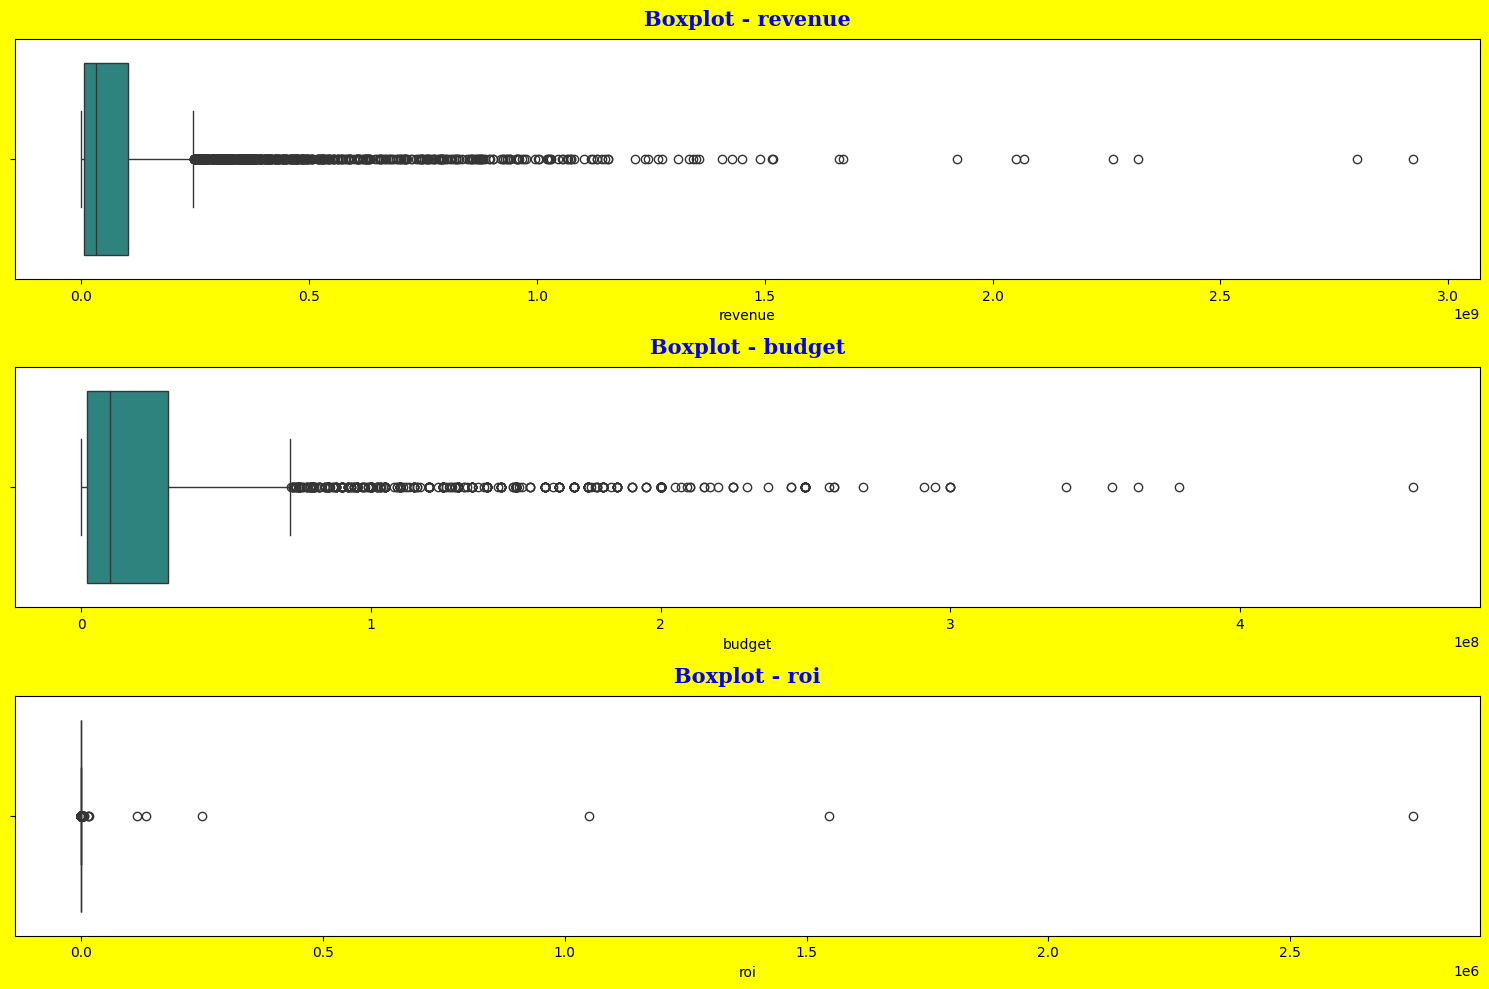

In [ ]:
# Crear la figura y los subplots
plt.figure(figsize=(15, 10))

# Primer subplot: Boxplot de 'revenue'
plt.subplot(3, 1, 1)
sns.boxplot(x=df_tmdb['revenue'], orient='h', palette='viridis')
plt.title('Boxplot - revenue', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'budget'
plt.subplot(3, 1, 2)
sns.boxplot(x=df_tmdb['budget'], orient='h', palette='viridis')
plt.title('Boxplot - budget', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'roi'
plt.subplot(3, 1, 3)
sns.boxplot(x=df_tmdb['roi'], orient='h', palette='viridis')
plt.title('Boxplot - roi', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Mostrar la figura
plt.tight_layout()
plt.show()

<ipython-input-56-b12d1ea86a12>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb_modified['revenue'], orient='h', palette='viridis')
<ipython-input-56-b12d1ea86a12>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb_modified['budget'], orient='h', palette='viridis')
<ipython-input-56-b12d1ea86a12>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_tmdb_modified['roi'], orient='h', palette='viridis')


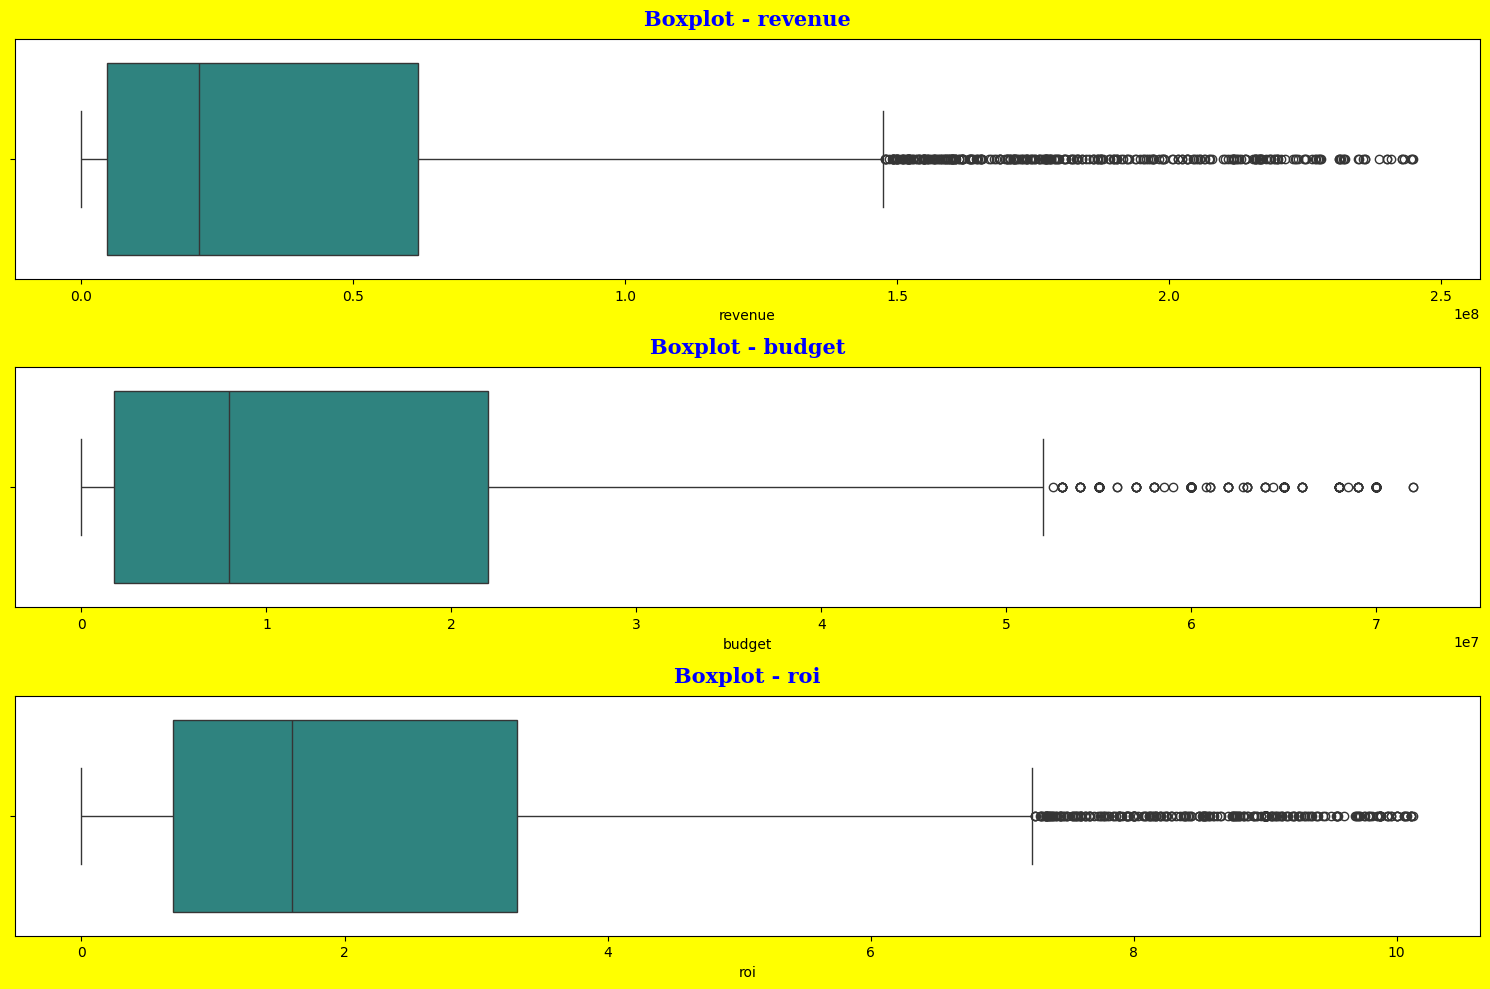

In [ ]:
# Calcular Q1 y Q3 para revenue, budget y roi
Q1_revenue = df_tmdb['revenue'].quantile(0.25)
Q3_revenue = df_tmdb['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue

Q1_budget = df_tmdb['budget'].quantile(0.25)
Q3_budget = df_tmdb['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget

Q1_roi = df_tmdb['roi'].quantile(0.25)
Q3_roi = df_tmdb['roi'].quantile(0.75)
IQR_roi = Q3_roi - Q1_roi

# Definir los límites
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

lower_bound_budget = Q1_budget - 1.5 * IQR_budget
upper_bound_budget = Q3_budget + 1.5 * IQR_budget

lower_bound_roi = Q1_roi - 1.5 * IQR_roi
upper_bound_roi = Q3_roi + 1.5 * IQR_roi

# # Filtrar el DataFrame para excluir los outliers
df_tmdb_modified = df_tmdb[
    (df_tmdb['revenue'] <= upper_bound_revenue) & (df_tmdb['budget'] <= upper_bound_budget) & (df_tmdb['roi'] <= upper_bound_roi) &
    (df_tmdb['revenue'] >= lower_bound_revenue) & (df_tmdb['budget'] >= lower_bound_budget) & (df_tmdb['roi'] >= lower_bound_roi)]

# df_tmdb_modified = df_tmdb.copy()
# df_tmdb_modified['revenue'] = df_tmdb['revenue'].clip(lower=lower_bound_revenue, upper=upper_bound_revenue)
# df_tmdb_modified['budget'] = df_tmdb['budget'].clip(lower=lower_bound_budget, upper=upper_bound_budget)
# df_tmdb_modified['roi'] = df_tmdb['roi'].clip(lower=lower_bound_roi, upper=upper_bound_roi)

# Crear la figura y los subplots
plt.figure(figsize=(15, 10))

# Primer subplot: Boxplot de 'startYear'
plt.subplot(3, 1, 1)
sns.boxplot(x=df_tmdb_modified['revenue'], orient='h', palette='viridis')
plt.title('Boxplot - revenue', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'runtimeMinutes'
plt.subplot(3, 1, 2)
sns.boxplot(x=df_tmdb_modified['budget'], orient='h', palette='viridis')
plt.title('Boxplot - budget', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Segundo subplot: Boxplot de 'roi'
plt.subplot(3, 1, 3)
sns.boxplot(x=df_tmdb_modified['roi'], orient='h', palette='viridis')
plt.title('Boxplot - roi', pad=10, fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.tight_layout()
plt.show()

In [ ]:
df_tmdb_modified.describe()

,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,roi
count,5110.00,5110.00,5110,5110.00,5110.00,5110.00,5110.00,5110.00
mean,6.34,1215.50,1998-07-25 04:10:31.232876672,42493739.93,106.99,14709134.79,17.06,2.38
min,0.00,0.00,1914-04-25 00:00:00,2.00,0.00,1.00,0.00,0.00
25%,5.92,68.00,1989-12-02 00:00:00,4635182.25,93.00,1750500.00,6.70,0.69
50%,6.54,472.00,2005-09-08 00:00:00,21615044.00,105.00,8000000.00,13.62,1.60
75%,7.12,1545.00,2013-10-28 18:00:00,61798576.50,120.00,22000000.00,20.16,3.31
max,10.00,27238.00,2024-06-01 00:00:00,244931766.00,279.00,72000000.00,2680.59,10.13
std,1.52,1956.28,NaN,51262495.83,28.21,16840241.35,49.60,2.30


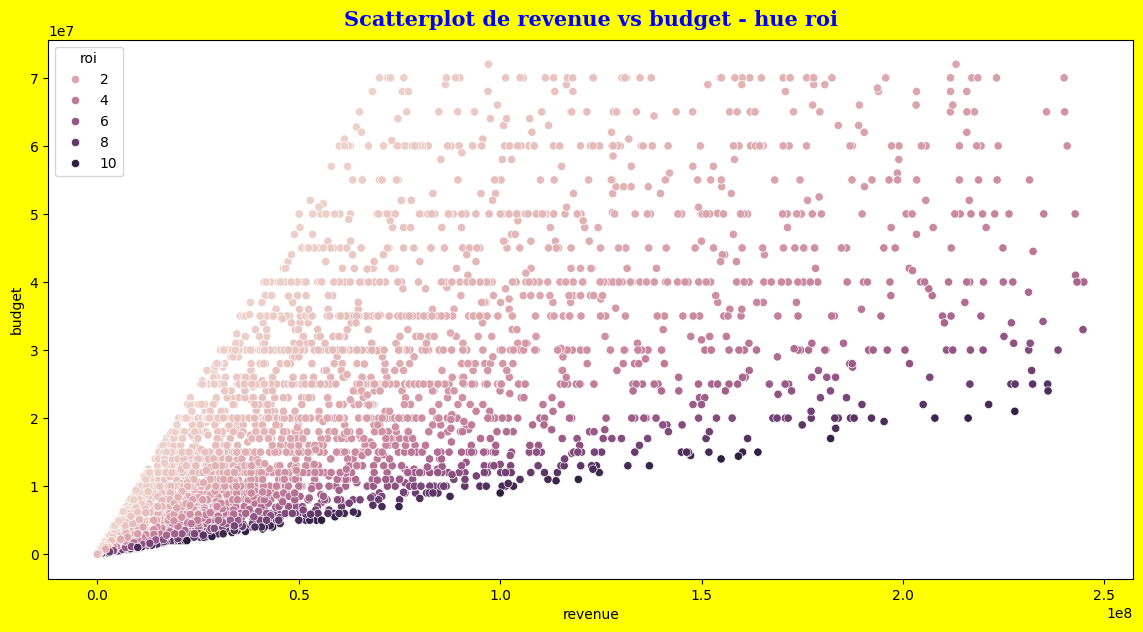

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_tmdb_modified, x='revenue', y='budget', hue= 'roi')

plt.title('Scatterplot de revenue vs budget - hue roi', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

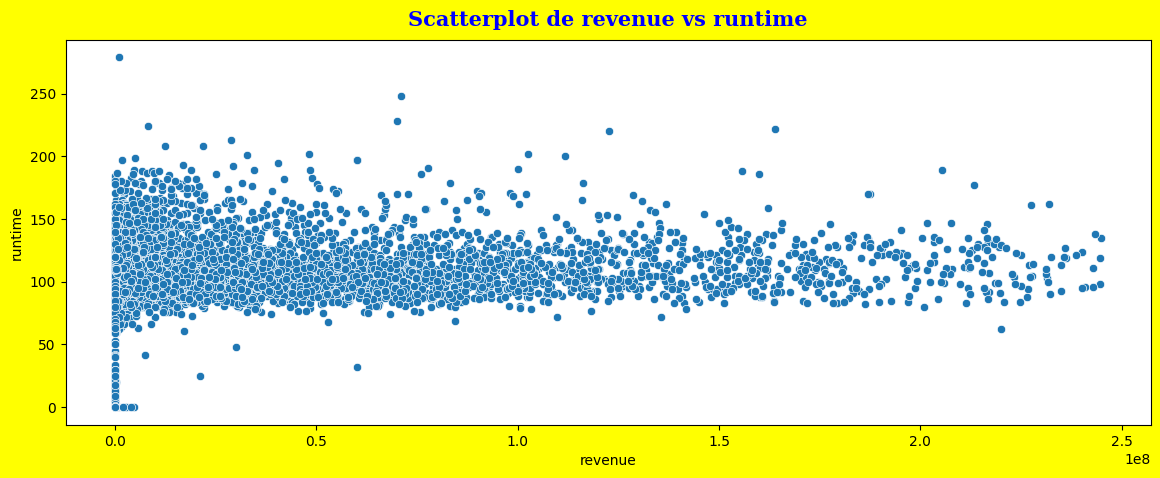

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified, x='revenue', y='runtime')

plt.title('Scatterplot de revenue vs runtime', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Vemos que el contenido que nos produce mayor revenue tiene un tiempo de duración entre 50 y 200 minutos, esto nos da un indicio que las movies y tvseries podrían estar encabezando.
* Validaremos los shorts, ya que al parecer no tiene mucho revenue, pero quizás no tiene mucho budget y podria generar muchos benficios.

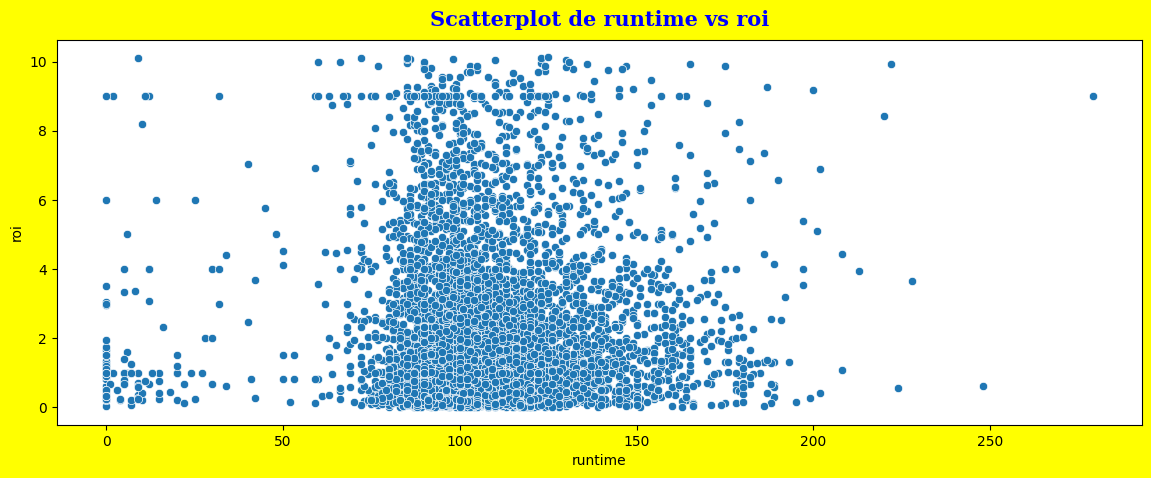

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified, x='runtime', y='roi')

plt.title('Scatterplot de runtime vs roi', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* Segun esto podemos validar que hay algunos shorts que nos generar cierto roi favorable. Considerando que mientras más se acerca a 10 es buen Roi.
* La mayoría de contenido que tiene un roi favorable, estan entre 50 y 200 minutos, pero tambien, en este tramo, hay contenido que el roi es muy bajo.

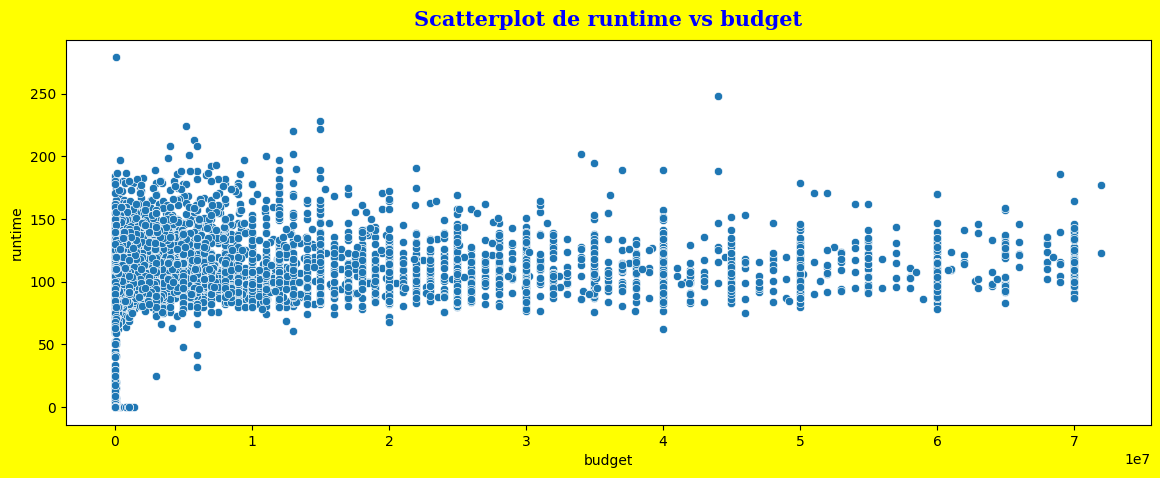

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_tmdb_modified, x='budget', y='runtime')

plt.title('Scatterplot de runtime vs budget', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')
plt.show()

* COmo era de suponer, el mayor presupuesto se da en contenido que tiene entre 50 y 200 minutos.
* Notamos tambien que hay contenido que tiene presupuesto muy bajo, para todo tipo de tiempo.
* Validaremos con el roi.

## 3. PREGUNTAS Y RESPUESTAS

In [ ]:
## Usaremos los siguientes dataframes analizados y acotados

print(df_title_basics_modified.info())
print('------------------------------------')
print(df_title_ratings_modified.info())
print('------------------------------------')
print(df_tmdb_modified.info())
print('------------------------------------')

<class 'pandas.core.frame.DataFrame'>
Index: 1127363 entries, 0 to 785533
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1127363 non-null  string
 1   titleType       1127363 non-null  string
 2   originalTitle   1127363 non-null  string
 3   isAdult         1127363 non-null  int64 
 4   startYear       1127363 non-null  int64 
 5   runtimeMinutes  1127363 non-null  int64 
 6   genres          1127363 non-null  string
dtypes: int64(3), string(4)
memory usage: 99.7 MB
None
------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1329396 entries, 0 to 1448328
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1329396 non-null  string 
 1   averageRating  1329396 non-null  float64
 2   numVotes       1329396 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usag

## Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?

In [ ]:
title_type_counts = df_title_basics_modified['titleType'].value_counts().reset_index()
title_type_counts

,titleType,count
0,short,635522
1,movie,397326
2,tvSeries,94515


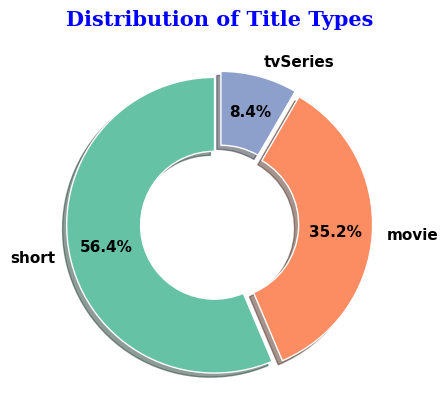

In [ ]:
# Crear el gráfico de pie
fig, ax = plt.subplots()

explode = (0.035, 0.035, 0.035)
ax.pie(title_type_counts['count'], labels=title_type_counts['titleType'], autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 11,'weight': 'bold'}, pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='w'),
       labeldistance=1.1, colors=plt.cm.Set2.colors, shadow=True)

# Título del gráfico
ax.set_title('Distribution of Title Types', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('white')

# Mostrar el gráfico
plt.show()

In [ ]:
subset = df_title_basics_modified[df_title_basics_modified['titleType'] == 'short']
avg_rating_by_year_short = subset.merge(df_title_ratings_modified, on='tconst').groupby('startYear')['averageRating'].mean()

subset = df_title_basics_modified[df_title_basics_modified['titleType'] == 'movie']
avg_rating_by_year_movie = subset.merge(df_title_ratings_modified, on='tconst').groupby('startYear')['averageRating'].mean()

subset = df_title_basics_modified[df_title_basics_modified['titleType'] == 'tvSeries']
avg_rating_by_year_tvSeries = subset.merge(df_title_ratings_modified, on='tconst').groupby('startYear')['averageRating'].mean()

In [ ]:
avg_rating_by_year_tvSeries = avg_rating_by_year_tvSeries.reset_index()[avg_rating_by_year_tvSeries.reset_index()['startYear']>1960]
avg_rating_by_year_movie = avg_rating_by_year_movie.reset_index()[avg_rating_by_year_movie.reset_index()['startYear']>1960]
avg_rating_by_year_short = avg_rating_by_year_short.reset_index()[avg_rating_by_year_short.reset_index()['startYear']>1960]

In [ ]:
avg_rating_by_year_tvSeries.head()

,startYear,averageRating
20,1961,7.53
21,1962,7.53
22,1963,7.59
23,1964,7.56
24,1965,7.53


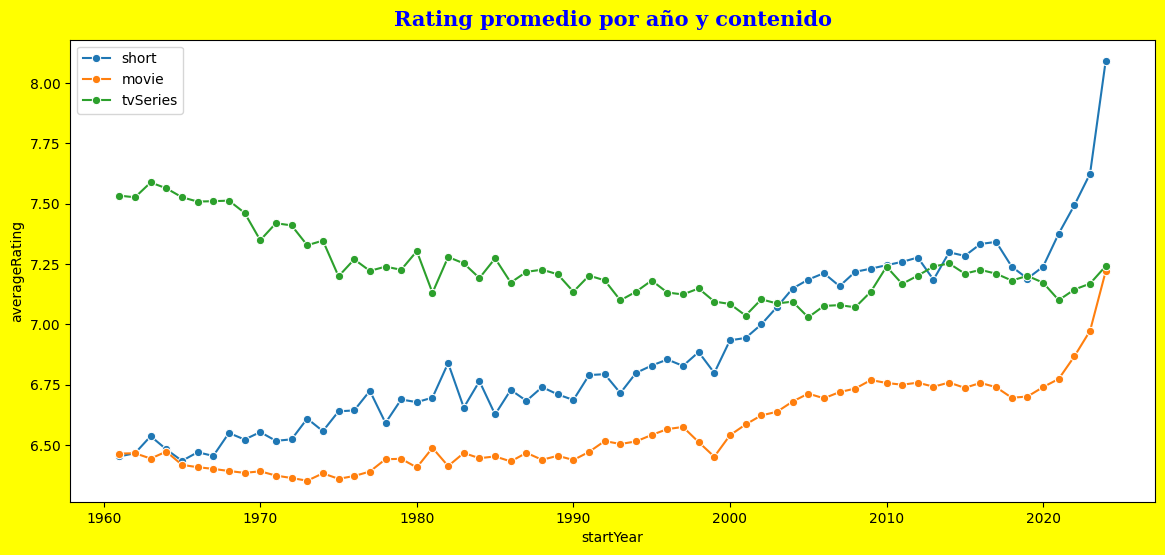

In [ ]:
# Creamos la figura
plt.figure(figsize=(14, 6))

sns.lineplot(data=avg_rating_by_year_short, x='startYear', y='averageRating', marker='o', label='short')
sns.lineplot(data=avg_rating_by_year_movie, x='startYear', y='averageRating', marker='o', label='movie')
sns.lineplot(data=avg_rating_by_year_tvSeries, x='startYear', y='averageRating', marker='o', label='tvSeries')

plt.title('Rating promedio por año y contenido', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

plt.show()

* Observamos que los shorts han tenido un rating en aumento constante, incluso para las fechas actuales son los que dan la hora. Se podria considerar recomendar short, quizás el publico actual esta influenciado por otras redes y por la disposición de tiempo y prefiere ver más shorts como si fueran reels de tiktok o youtube.
* Las movies también han tenido un aumento durante todos los años, mucho menos exponencial que los shorts. Por otro lado las tvSeries, si tuvieron un bajón, pero ultimamente han aumentado ligeramente.

<ipython-input-69-f5fa465d63ac>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='right')


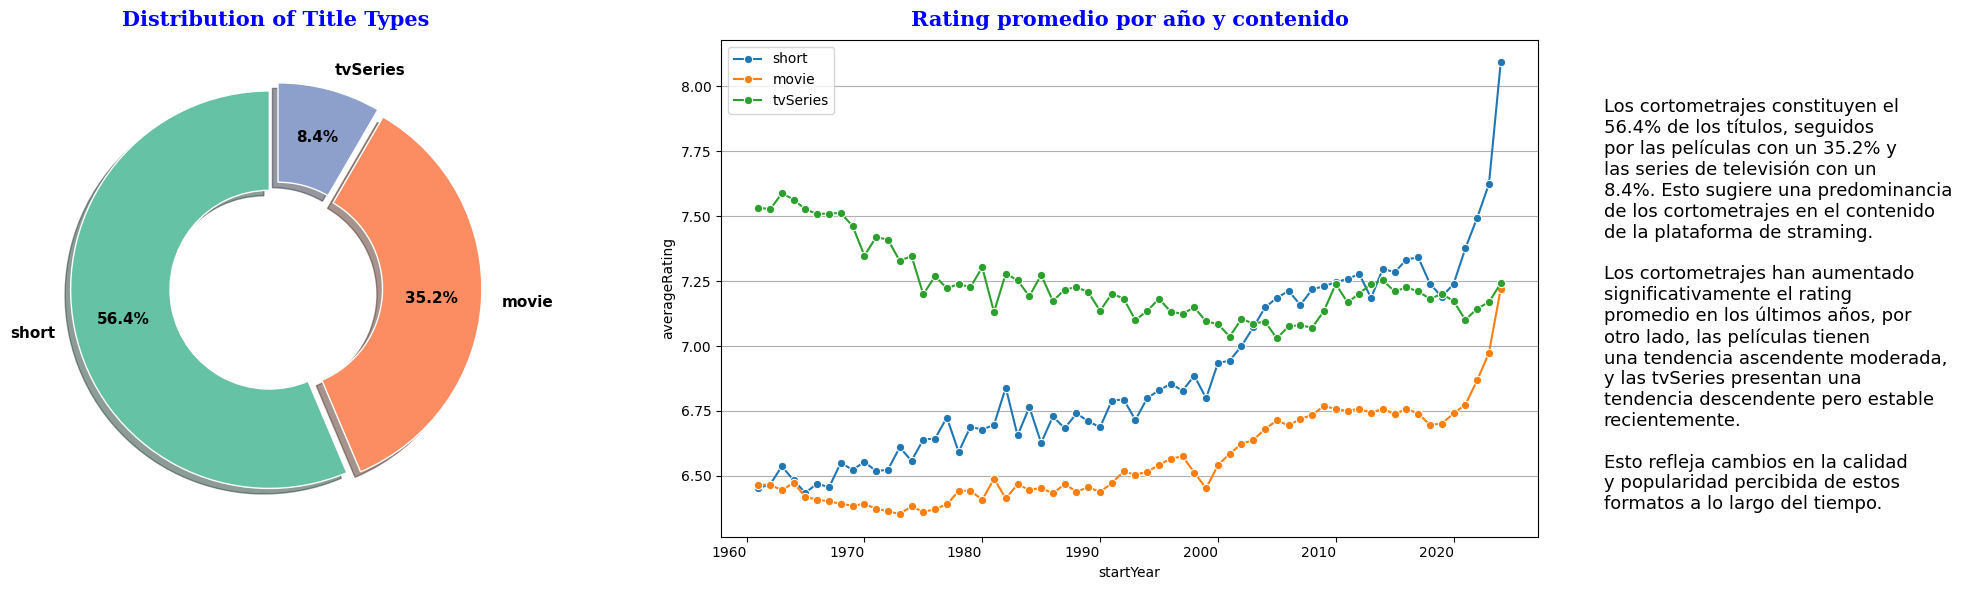

In [ ]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 6))

# Gráfico de pie
explode = (0.035, 0.035, 0.035)
ax1.pie(title_type_counts['count'], labels=title_type_counts['titleType'], autopct='%1.1f%%', startangle=90,
       explode=explode, textprops={'fontsize': 11,'weight': 'bold'}, pctdistance=0.75, wedgeprops=dict(width=0.5, edgecolor='w'),
       labeldistance=1.1, colors=plt.cm.Set2.colors, shadow=True)

# Título del gráfico de pie
ax1.set_title('Distribution of Title Types', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Gráfico de líneas
sns.lineplot(data=avg_rating_by_year_short, x='startYear', y='averageRating', marker='o', label='short', ax=ax2)
sns.lineplot(data=avg_rating_by_year_movie, x='startYear', y='averageRating', marker='o', label='movie', ax=ax2)
sns.lineplot(data=avg_rating_by_year_tvSeries, x='startYear', y='averageRating', marker='o', label='tvSeries', ax=ax2)

# Configurar el gráfico de líneas
ax2.set_title('Rating promedio por año y contenido', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})
ax2.set_facecolor('white')

# Ajustar la rotación de las etiquetas del eje x
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='right')
ax2.grid(axis='y')

# Establecer el color de fondo del gráfico de pie
fig.patch.set_facecolor('white')

# Añadir texto de conclusión
conclusion_text = '''
Los cortometrajes constituyen el
56.4% de los títulos, seguidos
por las películas con un 35.2% y
las series de televisión con un
8.4%. Esto sugiere una predominancia
de los cortometrajes en el contenido
de la plataforma de straming.

Los cortometrajes han aumentado
significativamente el rating
promedio en los últimos años, por
otro lado, las películas tienen
una tendencia ascendente moderada,
y las tvSeries presentan una
tendencia descendente pero estable
recientemente.

Esto refleja cambios en la calidad
y popularidad percibida de estos
formatos a lo largo del tiempo.'''

plt.figtext(1.03, 0.5, conclusion_text, fontsize=13, color='black', va='center', ha='left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Pregunta 2: ¿Cual es el rating promedio por género?

In [ ]:
df_title_basics_expanded = df_title_basics_modified.assign(genres=df_title_basics_modified['genres'].str.split(',')).explode('genres')

# Realizar el merge
df_merged = pd.merge(df_title_basics_expanded, df_title_ratings_modified, on='tconst')

df_genre_stats = df_merged.groupby('genres').agg(avg_rating=('averageRating', 'mean'), movie_count=('tconst', 'count')).reset_index()

In [ ]:
df_genre_stats.head(10)

,genres,avg_rating,movie_count
0,Action,6.63,30108
1,Adult,6.09,2868
2,Adventure,6.69,21565
3,Animation,6.74,30204
4,Biography,7.14,11187
5,Comedy,6.69,101752
6,Crime,6.61,28538
7,Documentary,7.28,63785
8,Drama,6.78,168453
9,Family,6.84,21870


<ipython-input-72-311f6fe21d52>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')  # Rotar los nombres del eje x en 45 grados


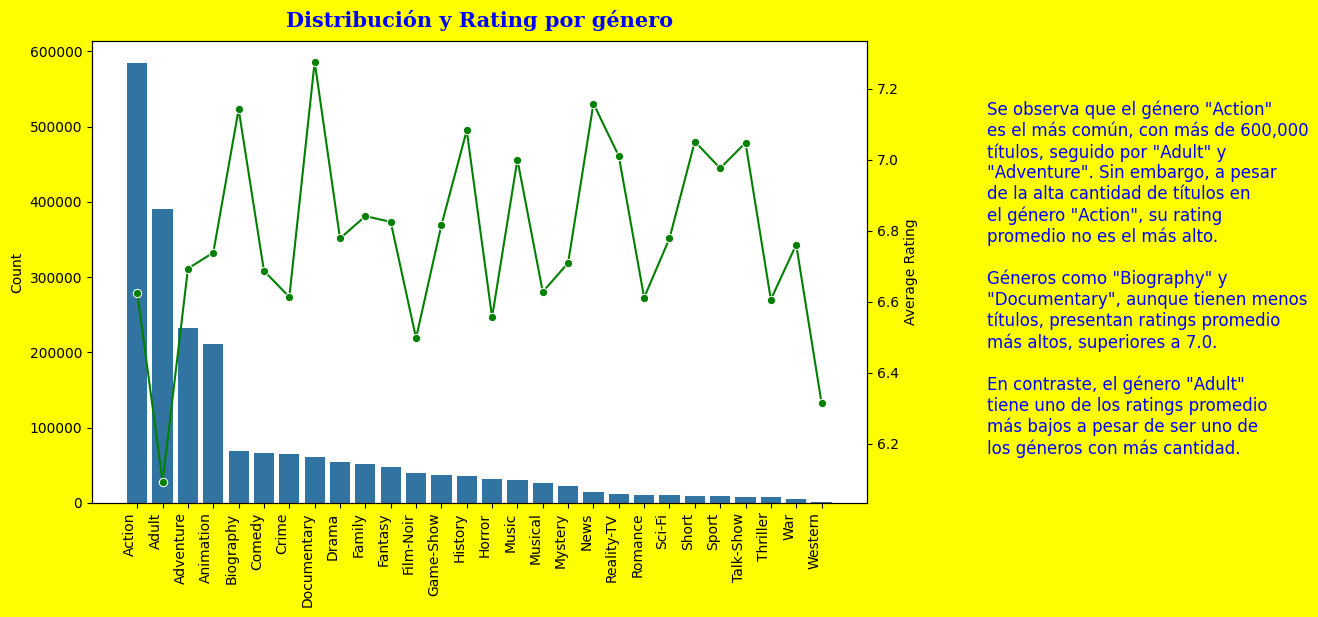

In [ ]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Grafico de barras
sns.countplot(data=df_title_basics_expanded, x='genres', ax=ax1, order=df_title_basics_expanded['genres'].value_counts().index)
ax1.set_ylabel('Count')

# Crear un segundo eje y graficar el rating promedio
ax2 = ax1.twinx()
sns.lineplot(data=df_genre_stats, x='genres', y='avg_rating', ax=ax2, color='g', marker='o')
ax2.set_ylabel('Average Rating')

# Configurar el gráfico
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')  # Rotar los nombres del eje x en 45 grados
ax1.set_xlabel('')

plt.title('Distribución y Rating por género', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
Se observa que el género "Action"
es el más común, con más de 600,000
títulos, seguido por "Adult" y
"Adventure". Sin embargo, a pesar
de la alta cantidad de títulos en
el género "Action", su rating
promedio no es el más alto.

Géneros como "Biography" y
"Documentary", aunque tienen menos
títulos, presentan ratings promedio
más altos, superiores a 7.0.

En contraste, el género "Adult"
tiene uno de los ratings promedio
más bajos a pesar de ser uno de
los géneros con más cantidad.'''

plt.figtext(1.02, 0.5, conclusion_text, fontsize=12, color='blue', va='center', ha='left')

plt.show()

## Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?

In [ ]:
df_tmdb_expanded = df_tmdb_modified.assign(genre=df_tmdb_modified['genres'].str.split(',').explode('genre').str.strip()).explode('genre')

In [ ]:
df_tmdb_expanded.head()

,vote_average,vote_count,release_date,revenue,runtime,budget,imdb_id,original_language,original_title,popularity,genres,production_countries,roi,genre
7,8.44,27238,1999-10-15,100853753,139,63000000,tt0137523,en,Fight Club,69.50,Drama,United States of America,0.60,Mystery
14,8.70,24649,1994-09-23,28341469,142,25000000,tt0111161,en,The Shawshank Redemption,122.61,"Drama, Crime",United States of America,0.13,Science Fiction
63,7.42,17923,2014-10-22,88761661,101,20000000,tt2911666,en,John Wick,55.74,"Action, Thriller",United States of America,3.44,Drama
80,7.60,16564,2016-11-10,203388186,116,47000000,tt2543164,en,Arrival,47.98,"Drama, Science Fiction, Mystery","Canada, India, United States of America",3.33,Drama
86,8.22,16205,1980-05-23,44781695,144,19000000,tt0081505,en,The Shining,45.25,"Horror, Thriller","United Kingdom, United States of America",1.36,Crime


In [ ]:
# Calcular el ROI promedio por género
df_genre_roi = df_tmdb_expanded.groupby('genre')['roi'].mean().sort_values(ascending=False).head(10)

In [ ]:
df_genre_roi.head()

genre
TV Movie          3.17
Science Fiction   2.72
Thriller          2.63
Music             2.62
Family            2.58
Name: roi, dtype: float64

<ipython-input-82-0089b5f3bc8e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)


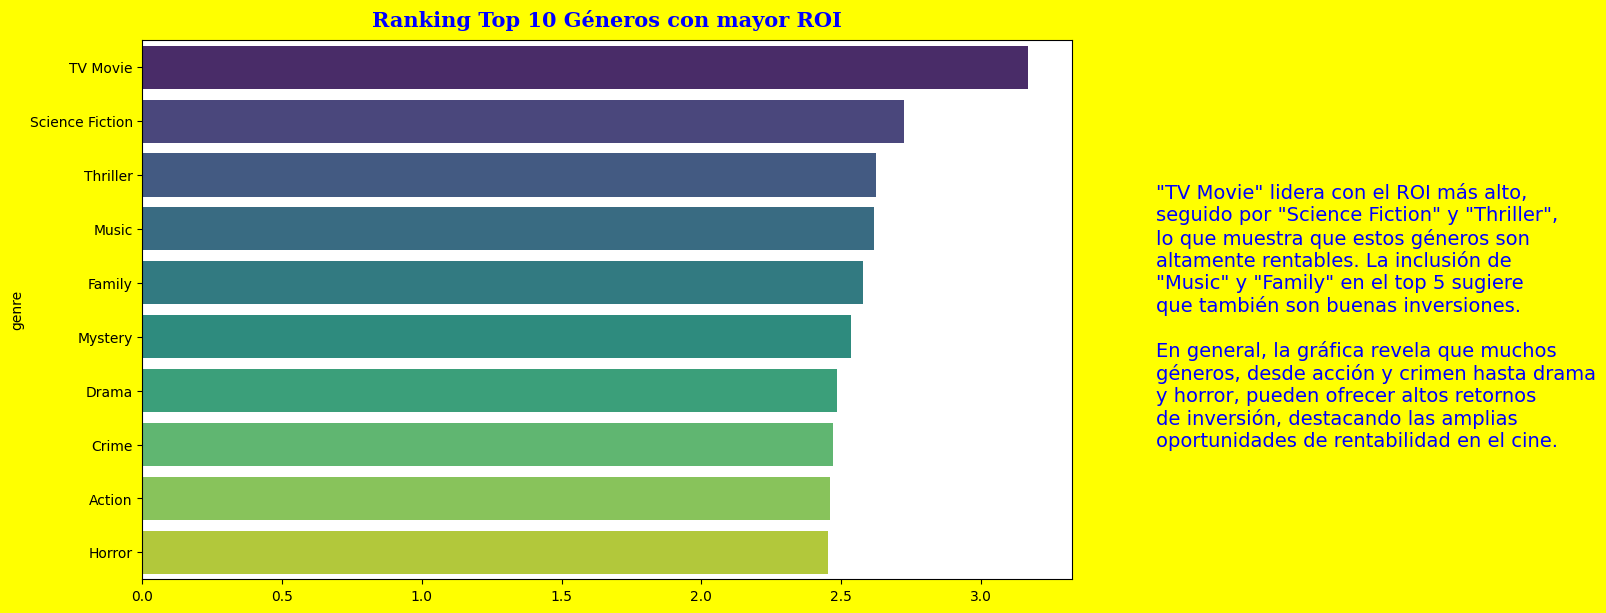

In [ ]:
# Crear el gráfico de barras verticales
fig, ax = plt.subplots(figsize=(12, 7))

# Grafico de barras
sns.barplot(x=df_genre_roi.values, y=df_genre_roi.index, palette='viridis', ax=ax)

plt.title('Ranking Top 10 Géneros con mayor ROI', pad=10,
          fontdict={'fontsize': 15, 'fontfamily':'serif', 'fontstyle':'normal', 'fontweight': 'heavy', 'color': 'blue'})

# Establecer el color de fondo del gráfico
plt.gcf().set_facecolor('yellow')

# Añadir texto de conclusión
conclusion_text = '''
"TV Movie" lidera con el ROI más alto,
seguido por "Science Fiction" y "Thriller",
lo que muestra que estos géneros son
altamente rentables. La inclusión de
"Music" y "Family" en el top 5 sugiere
que también son buenas inversiones.

En general, la gráfica revela que muchos
géneros, desde acción y crimen hasta drama
y horror, pueden ofrecer altos retornos
de inversión, destacando las amplias
oportunidades de rentabilidad en el cine.'''

plt.figtext(0.97, 0.5, conclusion_text, fontsize=14, color='blue', va='center', ha='left')

plt.show()



## Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?

In [ ]:
df_tmdb_exploded_countries = df_tmdb.assign(production_countries=df_tmdb['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()

In [ ]:
# Creamos un DataFrame con los datos necesarios para el gráfico
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)

In [ ]:
# Ordenamos el DataFrame por 'count' en orden descendente
df_plot = df_plot.sort_values(by='count', ascending=False)
df_plot = df_plot.head(10)
df_plot

,roi,count
production_countries,,
United States of America,986.44,4810
United Kingdom,5.09,712
India,16.12,535
France,3.65,407
Germany,3.43,290
Canada,5.58,267
Japan,10.14,172
China,6.09,123
Australia,51.30,115


In [ ]:

# Asignamos posiciones fijas en una cuadrícula
num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]


import plotly.express as px

# Creamos el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='roi',
                 text=df_plot.index,
                 color_continuous_scale='Blues',
                 size_max=110)

# Mostramos el gráfico
fig.show()

In [ ]:
# Asignamos posiciones fijas en una cuadrícula
num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]

# Crear el gráfico de burbujas usando Plotly
fig = px.scatter(df_plot, x='x', y='y',
                 size='count', color='roi',
                 text=df_plot.index,
                 color_continuous_scale='Blues',
                 size_max=100,
                 labels={'x': '', 'y': ''},
                 title='Países con mayor producción de contenido')

# Ajustes adicionales
fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    plot_bgcolor='white'
)

# Mejorar visibilidad de los colores
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Mostrar el gráfico
fig.show()